1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


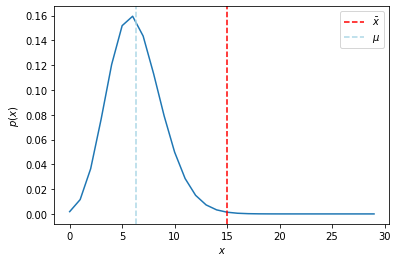

Probability of hurricanes  >15  : 0.222%


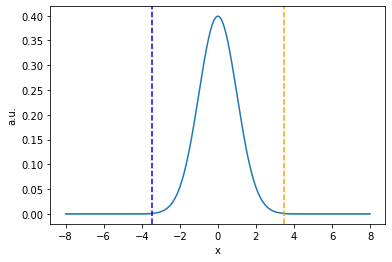

p-value = 0.00053
15 is NOT a statiscally significant number


In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import math
from scipy import fftpack
from scipy import interpolate
from scipy import optimize

mu =  6.3
sigma = np.sqrt(mu)
x_bar = 15
Z = abs(x_bar - mu) / sigma
print("Z =", Z)
k = np.arange(30)
y = stats.poisson.pmf(k, mu)
plt.plot(k, y)
plt.axvline(x_bar, linestyle='--', color='red', label=r'$\bar{x}$')
plt.axvline(mu, linestyle='--', color='lightblue', label='$\mu$')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()
p_15_or_more = (1. - np.sum(stats.poisson.pmf(np.arange(15), mu)))*100
print("Probability of hurricanes  >15  : {:.3f}%".format(p_15_or_more))
xs = np.linspace(-8, +8, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()
min_limit = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value = {:.5f}".format(pvalue))
print("{} is a statiscally significant number".format(x_bar) if pvalue >= min_limit else "{} is NOT a statiscally significant number".format(x_bar))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = math.sqrt((sigma_1**2+sigma_2**2)/2)

x_1 = np.mean(pre)
x_2 = np.mean(post)
T = (x_1-x_2)/(sigma*math.sqrt(2/n))

print("T: ",T)

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))

print("pvalue: ", pvalue)

T:  -3.786997938137629
pvalue:  0.004302464132864604


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 1  2  3  4  5  6  7  8  9 10 11 12]


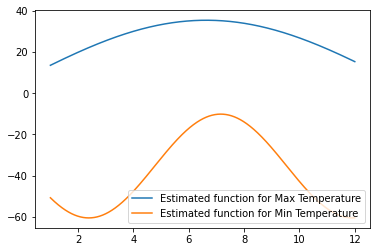

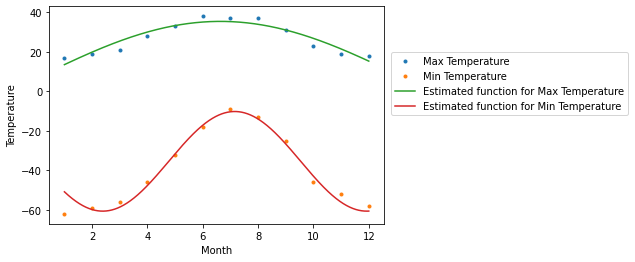

In [6]:
month = np.arange(1,13)
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

print(month)

def f(x, A, B, C):
    return C + A * np.sin(B * x)

max_params, max_params_covariance = optimize.curve_fit(f, month, max_temp, p0=[10, 1/2, np.mean(max_temp)])
min_params, min_params_covariance = optimize.curve_fit(f, month, min_temp, p0=[25, 1/2, np.mean(min_temp)])


lin = np.linspace(1,12, num=10000)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(lin, f(lin, max_params[0], max_params[1], max_params[2]), label = "Estimated function for Max Temperature")
ax.plot(lin, f(lin, min_params[0], min_params[1], min_params[2]), label = "Estimated function for Min Temperature")

ax.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(month, max_temp, '.', label = "Max Temperature")
ax.plot(month, min_temp, '.', label = "Min Temperature")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

max_params, max_params_covariance = optimize.curve_fit(f, month, max_temp, p0=[10, 1/2, np.mean(max_temp)])
min_params, min_params_covariance = optimize.curve_fit(f, month, min_temp, p0=[25, 1/2, np.mean(min_temp)])


lin = np.linspace(1,12, num=10000)
ax.plot(lin, f(lin, max_params[0], max_params[1], max_params[2]), label = "Estimated function for Max Temperature")
ax.plot(lin, f(lin, min_params[0], min_params[1], min_params[2]), label = "Estimated function for Min Temperature")

ax.legend(loc=(1.02, 0.5))

plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

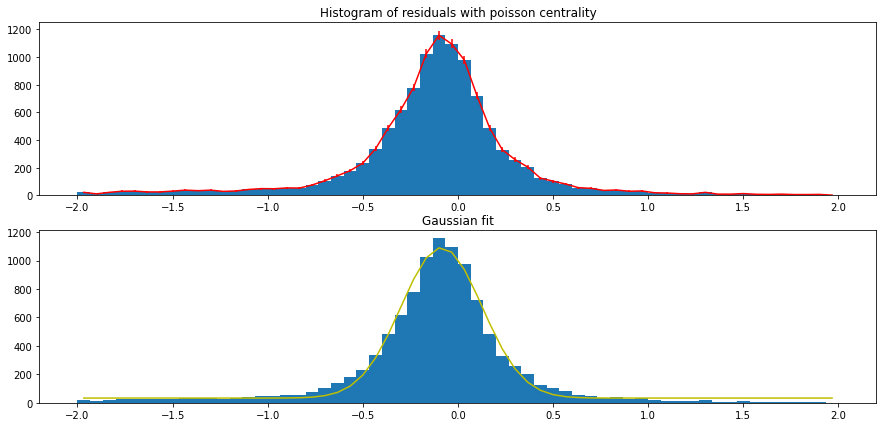

p value founded:  2.5068303585961304e-108
The p value is too small, so the fit is not satisfactory


In [10]:
import pickle
from scipy.optimize import curve_fit
from scipy import stats


def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data.item(0))
res = df['residuals'].to_numpy()

fig,(h1,h2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))
h,bins,_ = h1.hist(df['residuals'], bins = 60, range = (-2,2))
bin_centres = (bins[:-1] + bins[1:])/2.

sig_y = np.sqrt(np.abs(h))
h1.errorbar(x = bin_centres, y = h, yerr=sig_y, color="red")
h1.set_title("Histogram of residuals with poisson centrality")


parameters, covariance = curve_fit(gaussian, bin_centres, h)

gaussian_fit = gaussian(bin_centres, *parameters)

h2.plot(bin_centres, gaussian(bin_centres, *parameters), 'y-', label='gaussian fit')
h2.hist(df['residuals'], bins = 60, range = (-2,2))
h2.set_title("Gaussian fit")
plt.show()
statistic,p = stats.chisquare(h, gaussian_fit)
print("p value founded: ",p)
print("The p value is too small, so the fit is not satisfactory")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [11]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2023-01-20 16:26:33--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 16:26:33--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucda3cd26fab35a38d280061a143.dl.dropboxusercontent.com/cd/0/inline/B05tjGpQkuEmjh2aJDaNUFufCl5BaazVDZcGjxLX_BHdCqa-yzEgZHJYoyw17bN1zCugsiLpZ721oHKXAEFjp9i8RpLKGU7CbLiWPr7x8bZi7jWb-Rv1k8gVwSS9MA7vzUYIlvRBnGJiFOueYsvYixLKRmanpcKqF1XpdqIeDR2VcA/file# [following]
--2023-01-20 16:26:33--  https://ucda3cd26fab35a38d280061a143.dl.dropboxuserconte

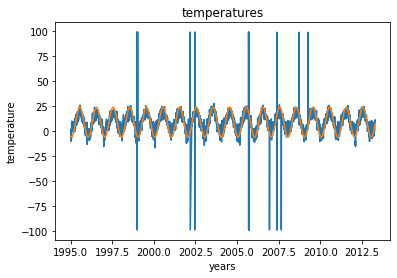

15 2.8 8.941907038598593
23.941394135329666
-6.058047035057573


In [14]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
 
x, y = np.loadtxt(open('data/munich_temperatures_average_with_bad_data.txt'), unpack = True)

a = 15
b = 2.8
c = np.mean(y)

p0 = [a,b,c]

def F(x, a, b, c):
    return a*np.cos(2*np.pi*x+b)+c
    
fit = curve_fit(F, x, y, p0=p0)
First_guess = F(x, *p0)

ymax = max(First_guess)
ymin = min(First_guess)



plt.plot(x, y)
plt.plot(x, First_guess)
plt.xlabel('years')
plt.ylabel('temperature')
plt.title('temperatures')
plt.show()
print (a, b, c)
print (ymax)
print(ymin)

#data/munich_temperatures_average_with_bad_data.txt